In [14]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import time
from SGA import SGA
from PMX import PMX
from utils import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
qap_data = [
    "nug12",
    "nug14",
    "nug15",
    "nug16a",
    "nug16b",
    "nug17",
    "nug18",
    "nug20",
    "nug21",
    "nug22",
    "nug24",
    "nug25",
    "nug27",
    "nug28",
#     "nug30",
    "tai50a",
    "tai60a",
    "tai80a"
]

In [9]:
QAP_INSTANCE_URL = lambda x: f'http://anjos.mgi.polymtl.ca/qaplib/data.d/{x}.dat'
def get_qap_data(qap):
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL(qap))

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)

    A = np.empty((n, n))
    if 'tai' not in qap:
        qap_instance_file.readline()
        
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    
    if qap != 'tai50a':
        qap_instance_file.readline()
        
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    return A, B, n

def qap_objective_function(p, A, B, n):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

Problem size: 12
nug12 596.0 3.0285887718200684


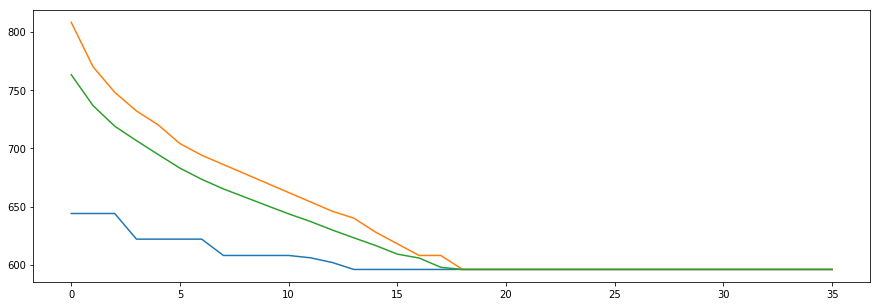

Problem size: 14
nug14 1038.0 3.745359182357788


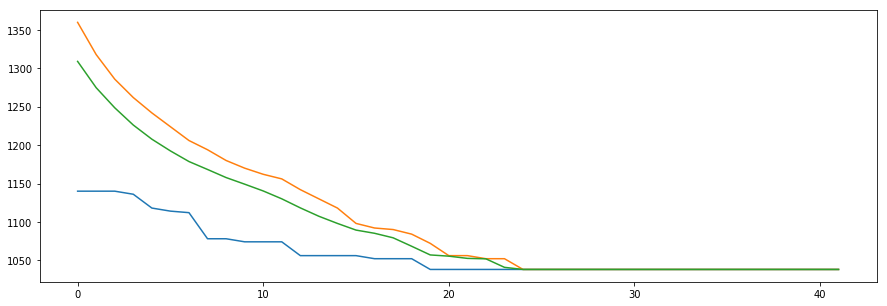

Problem size: 15
nug15 1184.0 3.9632577896118164


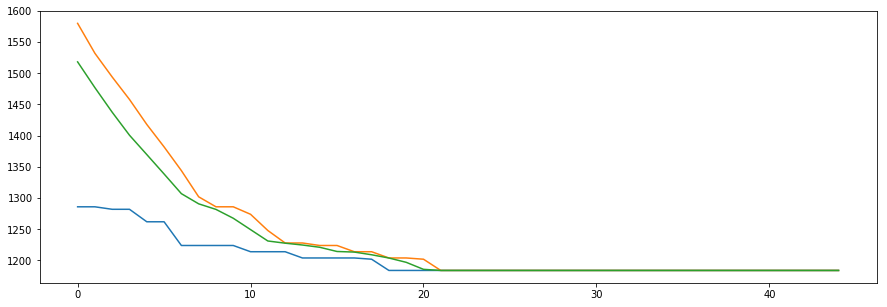

Problem size: 16
nug16a 1610.0 4.431154251098633


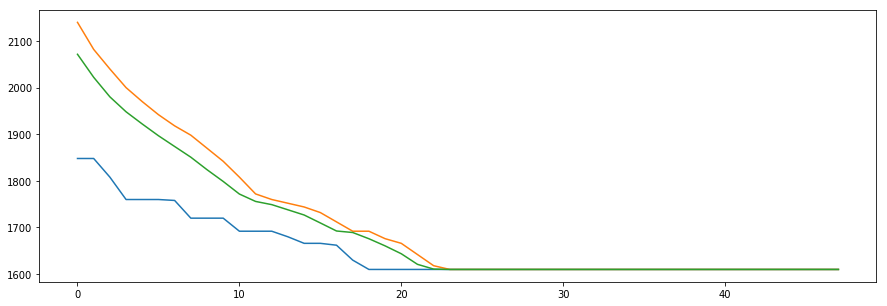

Problem size: 16
nug16b 1268.0 4.367411851882935


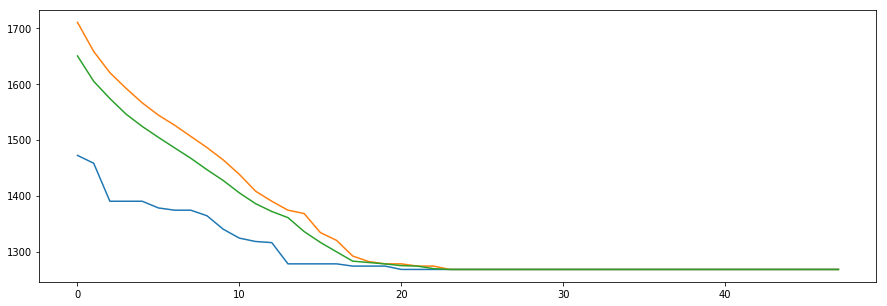

Problem size: 17
nug17 1778.0 4.693760633468628


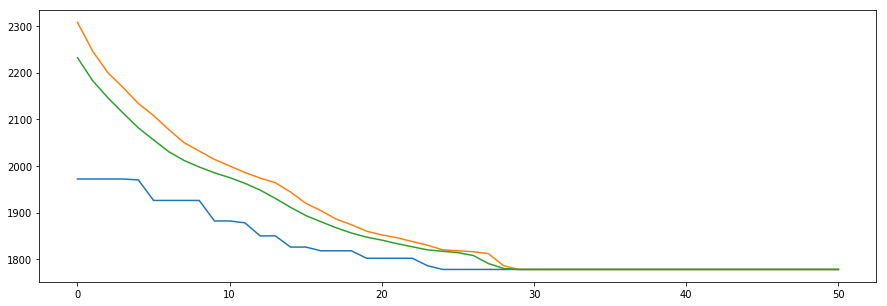

Problem size: 18
nug18 2014.0 5.063734531402588


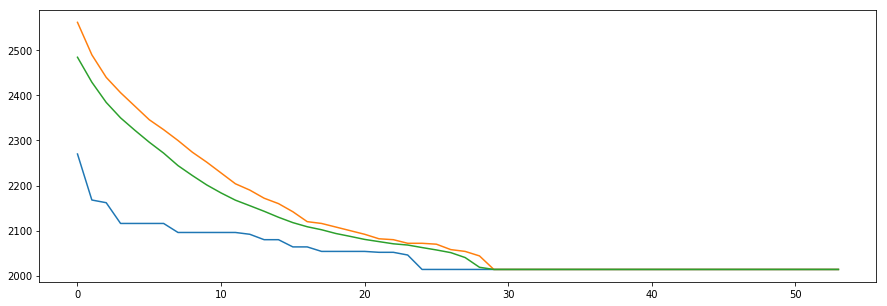

Problem size: 20
nug20 2704.0 6.514980792999268


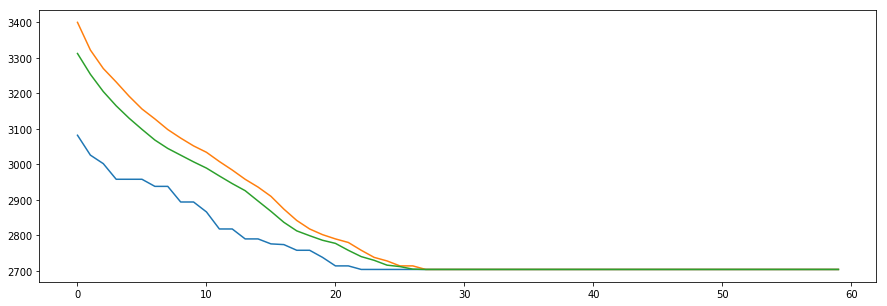

Problem size: 21
nug21 2540.0 6.830320835113525


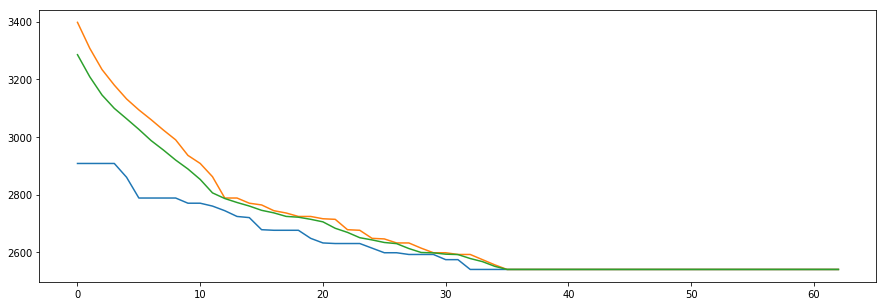

Problem size: 22
nug22 3658.0 7.495432376861572


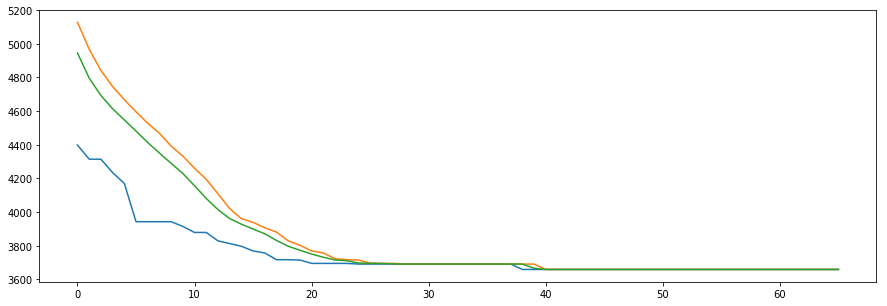

Problem size: 24
nug24 3744.0 8.390881061553955


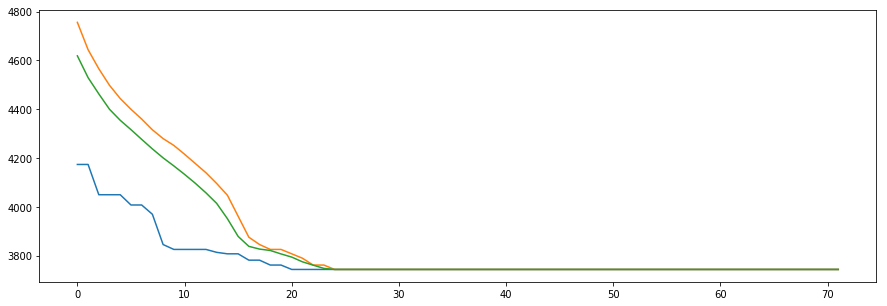

Problem size: 25
nug25 3888.0 9.209044694900513


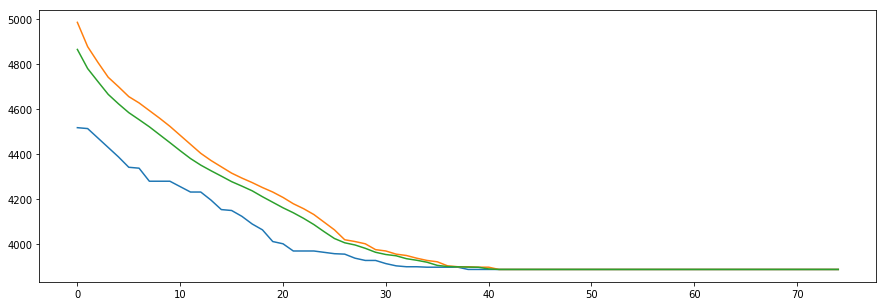

Problem size: 27
nug27 5456.0 10.018651008605957


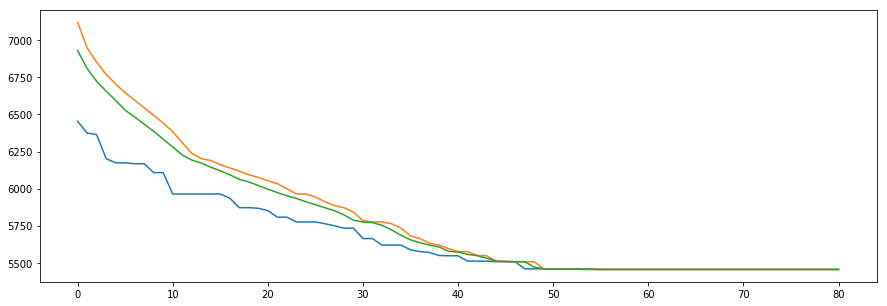

Problem size: 28
nug28 5506.0 10.181711196899414


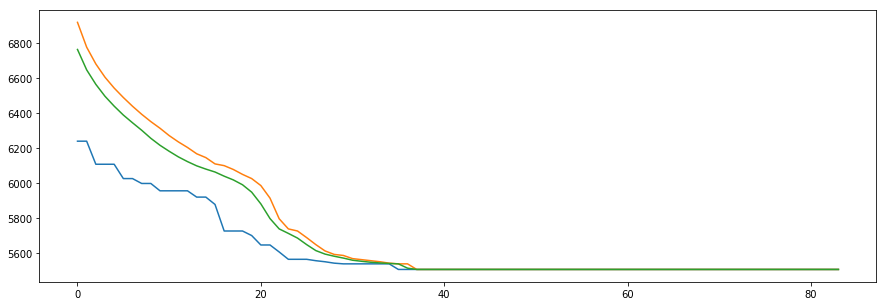

Problem size: 50
tai50a 5419260.0 28.96428394317627


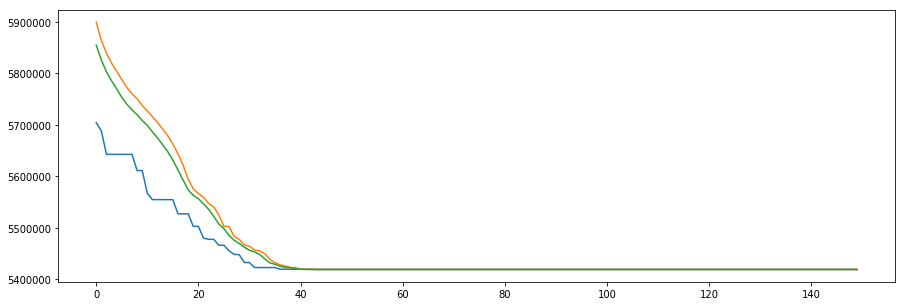

Problem size: 60
tai60a 7904418.0 40.698697566986084


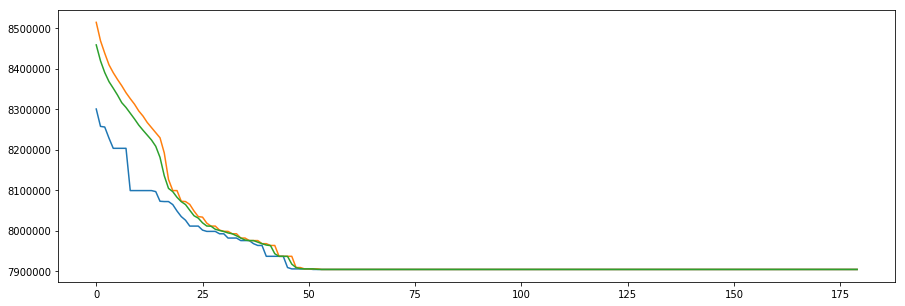

Problem size: 80
tai80a 14517288.0 68.31285238265991


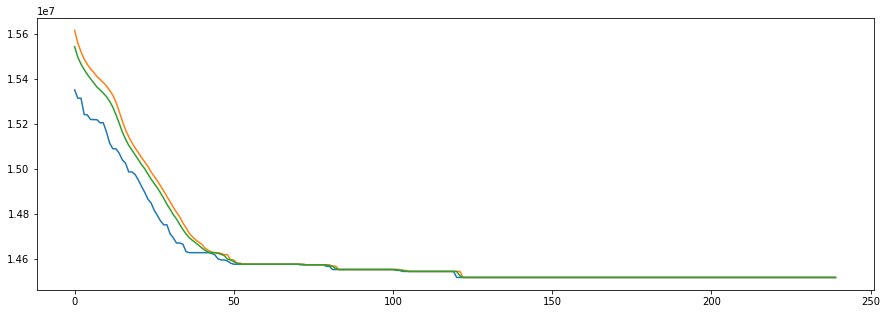

In [15]:
population_size = 500
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

for qap in qap_data:
    A, B, n = get_qap_data(qap)
    kwargs = {  
            'population_size':population_size,
            'chromosome_length': n,
            'number_of_offspring':number_of_offspring,
            'crossover_probability':crossover_probability,
            'mutation_probability':mutation_probability,
            'number_of_iterations': n*3,
            'tsp_objective_function':lambda x: qap_objective_function(x, A, B, n),
            'operator':PMX,
            'mutation':reverse_sequence_mutation,
        }
    
    plot_scores(title=qap, **kwargs)